# Preprocessing and cleaning of the data

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("../data/Ana Health_Tabela Modelo Previsão Churn - Tabela.csv")

Raw dataset

In [4]:
data.head()

,"PESSOA, PIPEDRIVE",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 63,Unnamed: 64,"COBRANÇA, VINDI",Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
1,250,1971-04-01,64,82,São Paulo,São Paulo,04534-020,417,NaN,2021-01-28,...,2,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
2,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
3,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
4,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE


## Manipulation of headers and columns

Merge Header with column names

    - PESSOA, PIPEDRIVE coulmns [A,R]
    - FUNIL ASSINATURA, PIPEDRIVE [S,X]
    - FUNIL ONBOARDING, PIPEDRIVE [Y, AH]
    - ATENDIMENTOS, AGENDA [AJ, AY]
    - WHOQOL [AZ, BD]
    - COMUNICARE [BE]
    - TWILIO [BF, BM]
    - COBRANÇA, VINDI [BN, BU]

In [5]:
def column_label_to_index(col_label):
    col_index = 0
    for c in col_label.upper():
        col_index = col_index * 26 + (ord(c) - ord('A') + 1)
    return col_index - 1


def add_prefix_to_first_row(dataframe, prefix, start_col_label, end_col_label):
    start_col = column_label_to_index(start_col_label)
    end_col = column_label_to_index(end_col_label)
    for col in range(start_col, end_col + 1):
        dataframe.iat[0, col] = prefix + dataframe.iat[0, col]

In [6]:
add_prefix_to_first_row(data, 'PESSOA_PIPEDRIVE_', 'A', 'R')
add_prefix_to_first_row(data, 'FUNIL_ASSINATURA_PIPEDRIVE_', 'S', 'X')
add_prefix_to_first_row(data, 'FUNIL_ONBOARDING_PIPEDRIVE_', 'Y', 'AH')
add_prefix_to_first_row(data, 'ATENDIMENTOS_AGENDA_', 'AJ', 'AY')
add_prefix_to_first_row(data, 'WHOQOL_', 'AZ', 'BD')
add_prefix_to_first_row(data, 'COMUNICARE_', 'BE', 'BE')
add_prefix_to_first_row(data, 'TWILIO_', 'BF', 'BM')
add_prefix_to_first_row(data, 'COBRANÇA_VINDI_', 'BN', 'BU')

In [7]:
data.columns = data.iloc[0]
data = data.drop(data.index[0])

Final result


In [8]:
data.head()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_birthdate,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_id_health_plan,PESSOA_PIPEDRIVE_id_person_recommendation,PESSOA_PIPEDRIVE_contract_start_date,...,TWILIO_Ligações Outbound,TWILIO_Data Última Ligações Outbound,COBRANÇA_VINDI_Qde Total de Faturas,COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança,COBRANÇA_VINDI_Método de Pagamento,COBRANÇA_VINDI_Valor Médio da Mensalidade,COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento,COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes,COBRANÇA_VINDI_Valor Total Inadimplência,COBRANÇA_VINDI_Qde Perfis de Pagamento Inativos
1,250,1971-04-01,64,82,São Paulo,São Paulo,04534-020,417,NaN,2021-01-28,...,2,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
2,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
3,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
4,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE
5,317,1986-10-14,NaN,NaN,São Paulo,São Paulo,05421-050,NaN,NaN,2021-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FALSE


## Understanding the dataset


In [9]:
data.shape

(1202, 73)

In [10]:
data.describe()

,PESSOA_PIPEDRIVE_id_person,PESSOA_PIPEDRIVE_birthdate,PESSOA_PIPEDRIVE_id_gender,PESSOA_PIPEDRIVE_id_marrital_status,PESSOA_PIPEDRIVE_state,PESSOA_PIPEDRIVE_city,PESSOA_PIPEDRIVE_postal_code,PESSOA_PIPEDRIVE_id_health_plan,PESSOA_PIPEDRIVE_id_person_recommendation,PESSOA_PIPEDRIVE_contract_start_date,...,TWILIO_Ligações Outbound,TWILIO_Data Última Ligações Outbound,COBRANÇA_VINDI_Qde Total de Faturas,COBRANÇA_VINDI_Qde Total de Tentativas de Cobrança,COBRANÇA_VINDI_Método de Pagamento,COBRANÇA_VINDI_Valor Médio da Mensalidade,COBRANÇA_VINDI_Qde Total de Faturas Pagas após Vencimento,COBRANÇA_VINDI_Qde Total de Faturas Inadimpletes,COBRANÇA_VINDI_Valor Total Inadimplência,COBRANÇA_VINDI_Qde Perfis de Pagamento Inativos
count,1202,1191,1178,1178,1185,1183,1163,524,110,1202,...,579,579,252,252,252,252,252,252,252,1202
unique,1202,1100,5,4,24,196,932,47,81,422,...,16,575,21,36,4,33,10,7,16,1
top,250,1995-01-16,64,80,São Paulo,São Paulo,69730-000,412,2379,2023-06-12,...,1,2022-12-22 19:46:59,3,1,Cartão de crédito,88.00,0,0,0,FALSE
freq,1,8,602,830,570,197,96,281,9,43,...,240,3,35,27,227,99,150,218,218,1202


## Managing missing values


In [11]:
import missingno as msno

<Axes: xlabel='0'>

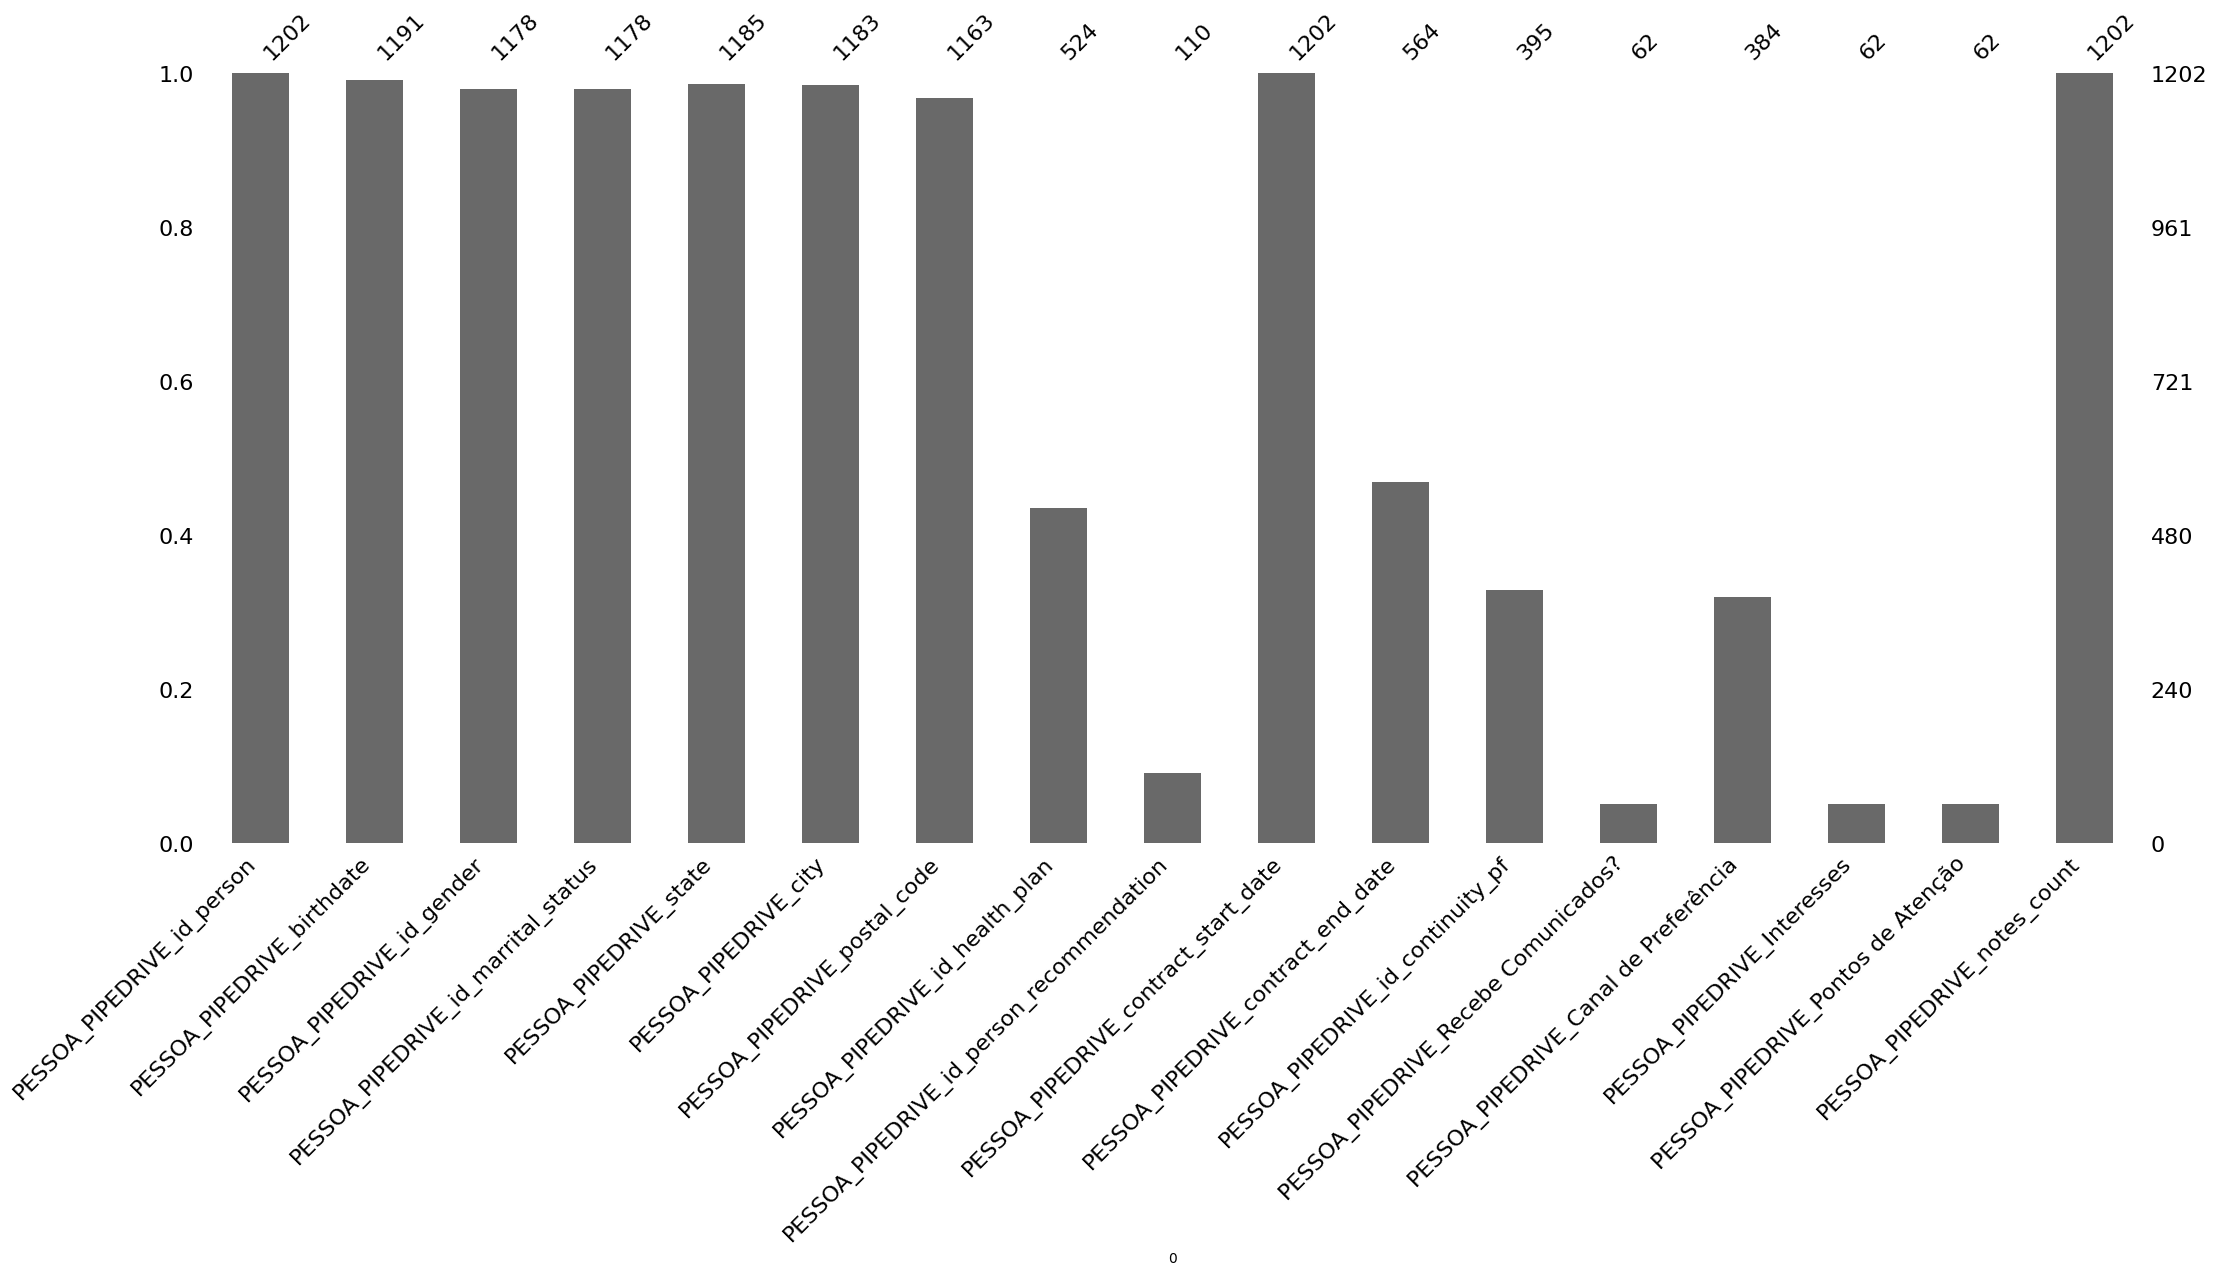

In [12]:
msno.bar(data.iloc[:,:17])

## Dropping columns with no information

    - PESSOA_PIPEDRIVE_id_person_recommendation: Identificador da pessoa que fez a indicação do benefício da Ana Health para nosso associado
    
    - PESSOA_PIPEDRIVE_Recebe Comunicados?:  Indicação se a pessoa recebe comunicados por WhatsApp da equipe de saúde da Ana Health (Opt-out)

    - PESSOA_PIPEDRIVE_Interesses: Áreas de interesse da pessoa identificados durante onversa com a equipe de saúde
    
    - PESSOA_PIPEDRIVE_Pontos de Atenção: Informações relevantes sobre a condição de saúde da pessoa, Determinantes Sociais de Saúde e Territorialização

    - FUNIL_ONBOARDING_PIPEDRIVE_id_label: Identificador do status do agendamento durante o processo de onboarding: Convera Agendada, Reagendar 


NaN No recomendation

In [13]:
data["PESSOA_PIPEDRIVE_id_person_recommendation"].value_counts()

PESSOA_PIPEDRIVE_id_person_recommendation
2379    9
1201    5
4166    4
2094    3
3238    3
       ..
3400    1
1269    1
3305    1
3261    1
4376    1
Name: count, Length: 81, dtype: int64

nan No recomendation

In [14]:
data["PESSOA_PIPEDRIVE_Recebe Comunicados?"].value_counts() 

PESSOA_PIPEDRIVE_Recebe Comunicados?
FALSE    62
Name: count, dtype: int64

nan No interest

In [15]:
data["PESSOA_PIPEDRIVE_Interesses"].value_counts() 

PESSOA_PIPEDRIVE_Interesses
FALSE    62
Name: count, dtype: int64

nan no important information

In [16]:
data["PESSOA_PIPEDRIVE_Pontos de Atenção"].value_counts() 

PESSOA_PIPEDRIVE_Pontos de Atenção
FALSE    62
Name: count, dtype: int64

no identification of status

In [17]:
data["FUNIL_ONBOARDING_PIPEDRIVE_id_label"].value_counts() 

FUNIL_ONBOARDING_PIPEDRIVE_id_label
325    54
313    40
284     8
323     1
Name: count, dtype: int64

In [18]:
data = data.drop(["PESSOA_PIPEDRIVE_id_person_recommendation","PESSOA_PIPEDRIVE_Recebe Comunicados?", "PESSOA_PIPEDRIVE_Interesses", "PESSOA_PIPEDRIVE_Pontos de Atenção", "FUNIL_ONBOARDING_PIPEDRIVE_id_label"], axis=1)

## Loking closely over each of the columns

### PESSOA_PIPEDRIVE_birthdate

Preecher NaN com a média

In [19]:
import pandas as pd
from datetime import datetime
import numpy as np

data['PESSOA_PIPEDRIVE_birthdate'] = pd.to_datetime(data['PESSOA_PIPEDRIVE_birthdate'])
data['PESSOA_PIPEDRIVE_age'] = data['PESSOA_PIPEDRIVE_birthdate'].apply(
    lambda x: datetime.today().year - x.year - ((datetime.today().month, datetime.today().day) < (x.month, x.day))
)


In [20]:
data['PESSOA_PIPEDRIVE_age'].describe()

count    1191.000000
mean       32.236776
std        10.486375
min         0.000000
25%        26.000000
50%        30.000000
75%        36.000000
max        88.000000
Name: PESSOA_PIPEDRIVE_age, dtype: float64

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data['PESSOA_PIPEDRIVE_age'] = imputer.fit_transform(data['PESSOA_PIPEDRIVE_age'].values.reshape(-1, 1))
data['PESSOA_PIPEDRIVE_age'] = np.round(data['PESSOA_PIPEDRIVE_age']).astype(int)

In [22]:
data = data.drop(['PESSOA_PIPEDRIVE_birthdate'], axis=1 )

### PESSOA_PIPEDRIVE_id_gender

Preencher NaN com a moda

In [23]:
data["PESSOA_PIPEDRIVE_id_gender"].value_counts()

PESSOA_PIPEDRIVE_id_gender
64     602
63     571
117      3
110      1
111      1
Name: count, dtype: int64

In [24]:
rows_to_drop = data[data["PESSOA_PIPEDRIVE_id_gender"].isin([117,110,111])]

In [25]:
data = data.drop(rows_to_drop.index, axis=0)

In [26]:
data["PESSOA_PIPEDRIVE_id_gender"].fillna(64, inplace=True)

### PESSOA_PIPEDRIVE_id_marrital_status

Preencher NaN com a moda

In [27]:
data["PESSOA_PIPEDRIVE_id_marrital_status"].value_counts()

PESSOA_PIPEDRIVE_id_marrital_status
80    830
82    300
83     41
81      7
Name: count, dtype: int64

In [28]:
data["PESSOA_PIPEDRIVE_id_marrital_status"].fillna(80, inplace=True)

# PESSOA_PIPEDRIVE_state

In [29]:
data["PESSOA_PIPEDRIVE_state"].value_counts()

PESSOA_PIPEDRIVE_state
São Paulo              570
Amazonas               149
Santa Catarina          99
Rio de Janeiro          79
Minas Gerais            65
Paraná                  62
Bahia                   42
Pernambuco              20
Rio Grande do Sul       20
Ceará                   16
Paraíba                 11
Distrito Federal         9
State of Amazonas        9
Pará                     7
Espírito Santo           5
Rio Grande do Norte      5
Goiás                    4
Piauí                    3
Mato Grosso do Sul       2
Sergipe                  2
Maranhão                 2
Alagoas                  2
North Carolina           1
Mato Grosso              1
Name: count, dtype: int64

In [31]:

data["PESSOA_PIPEDRIVE_state"].fillna(data["PESSOA_PIPEDRIVE_state"].mode()[0], inplace=True)


# PESSOA_PIPEDRIVE_city

Preencher com a moda

In [32]:
data["PESSOA_PIPEDRIVE_city"].value_counts()

PESSOA_PIPEDRIVE_city
São Paulo               197
São Carlos              104
Novo Airão               96
Rio de Janeiro           62
Manaus                   60
                       ... 
Natal                     1
Vitória da Conquista      1
Mecklenburg County        1
Garopaba                  1
Querência                 1
Name: count, Length: 196, dtype: int64

In [33]:

data["PESSOA_PIPEDRIVE_city"].fillna(data["PESSOA_PIPEDRIVE_city"].mode()[0], inplace=True)


# PESSOA_PIPEDRIVE_postal_code


Drop column with no information

In [34]:
data["PESSOA_PIPEDRIVE_postal_code"].value_counts()

PESSOA_PIPEDRIVE_postal_code
69730-000    96
22240-000    14
13560-450     6
22071-100     5
04534-020     5
             ..
90160-091     1
04814-330     1
31515-200     1
08431-480     1
22280-010     1
Name: count, Length: 932, dtype: int64

In [35]:
# data = data.drop(["PESSOA_PIPEDRIVE_postal_code"], axis=1)

# PESSOA_PIPEDRIVE_id_health_plan

Decedi os nulos preencher com a moda, já que é a grnade maioria dos associados.

Além de criar uma coluna para tem plano privado ou tem plano público, pois assim podemos entender melhor o perfil dos associados.

In [36]:
data['PESSOA_PIPEDRIVE_id_health_plan'].value_counts()

PESSOA_PIPEDRIVE_id_health_plan
412     281
415      53
435      28
418      26
423      22
438      15
78       14
79       13
453       7
425       6
422       5
429       5
426       4
417       3
722       3
451       2
430       2
1048      2
1137      2
427       2
452       2
437       2
441       1
440       1
428       1
1151      1
932       1
983       1
1147      1
1164      1
1136      1
1079      1
844       1
495       1
448       1
849       1
413       1
450       1
442       1
421       1
447       1
414       1
449       1
419       1
443       1
446       1
439       1
Name: count, dtype: int64

In [37]:
data['PESSOA_PIPEDRIVE_id_health_plan'].fillna(data['PESSOA_PIPEDRIVE_id_health_plan'].mode()[0], inplace=True)

In [38]:
data['PESSOA_PIPEDRIVE_has_public_health_plan'] = data['PESSOA_PIPEDRIVE_id_health_plan'].apply(lambda x: 1 if int(x) == 412 else 0)

In [39]:
data['PESSOA_PIPEDRIVE_has_public_health_plan'].value_counts()

PESSOA_PIPEDRIVE_has_public_health_plan
1    959
0    243
Name: count, dtype: int64

In [40]:
data = data.drop(['PESSOA_PIPEDRIVE_id_health_plan'], axis=1)

<Axes: xlabel='0'>

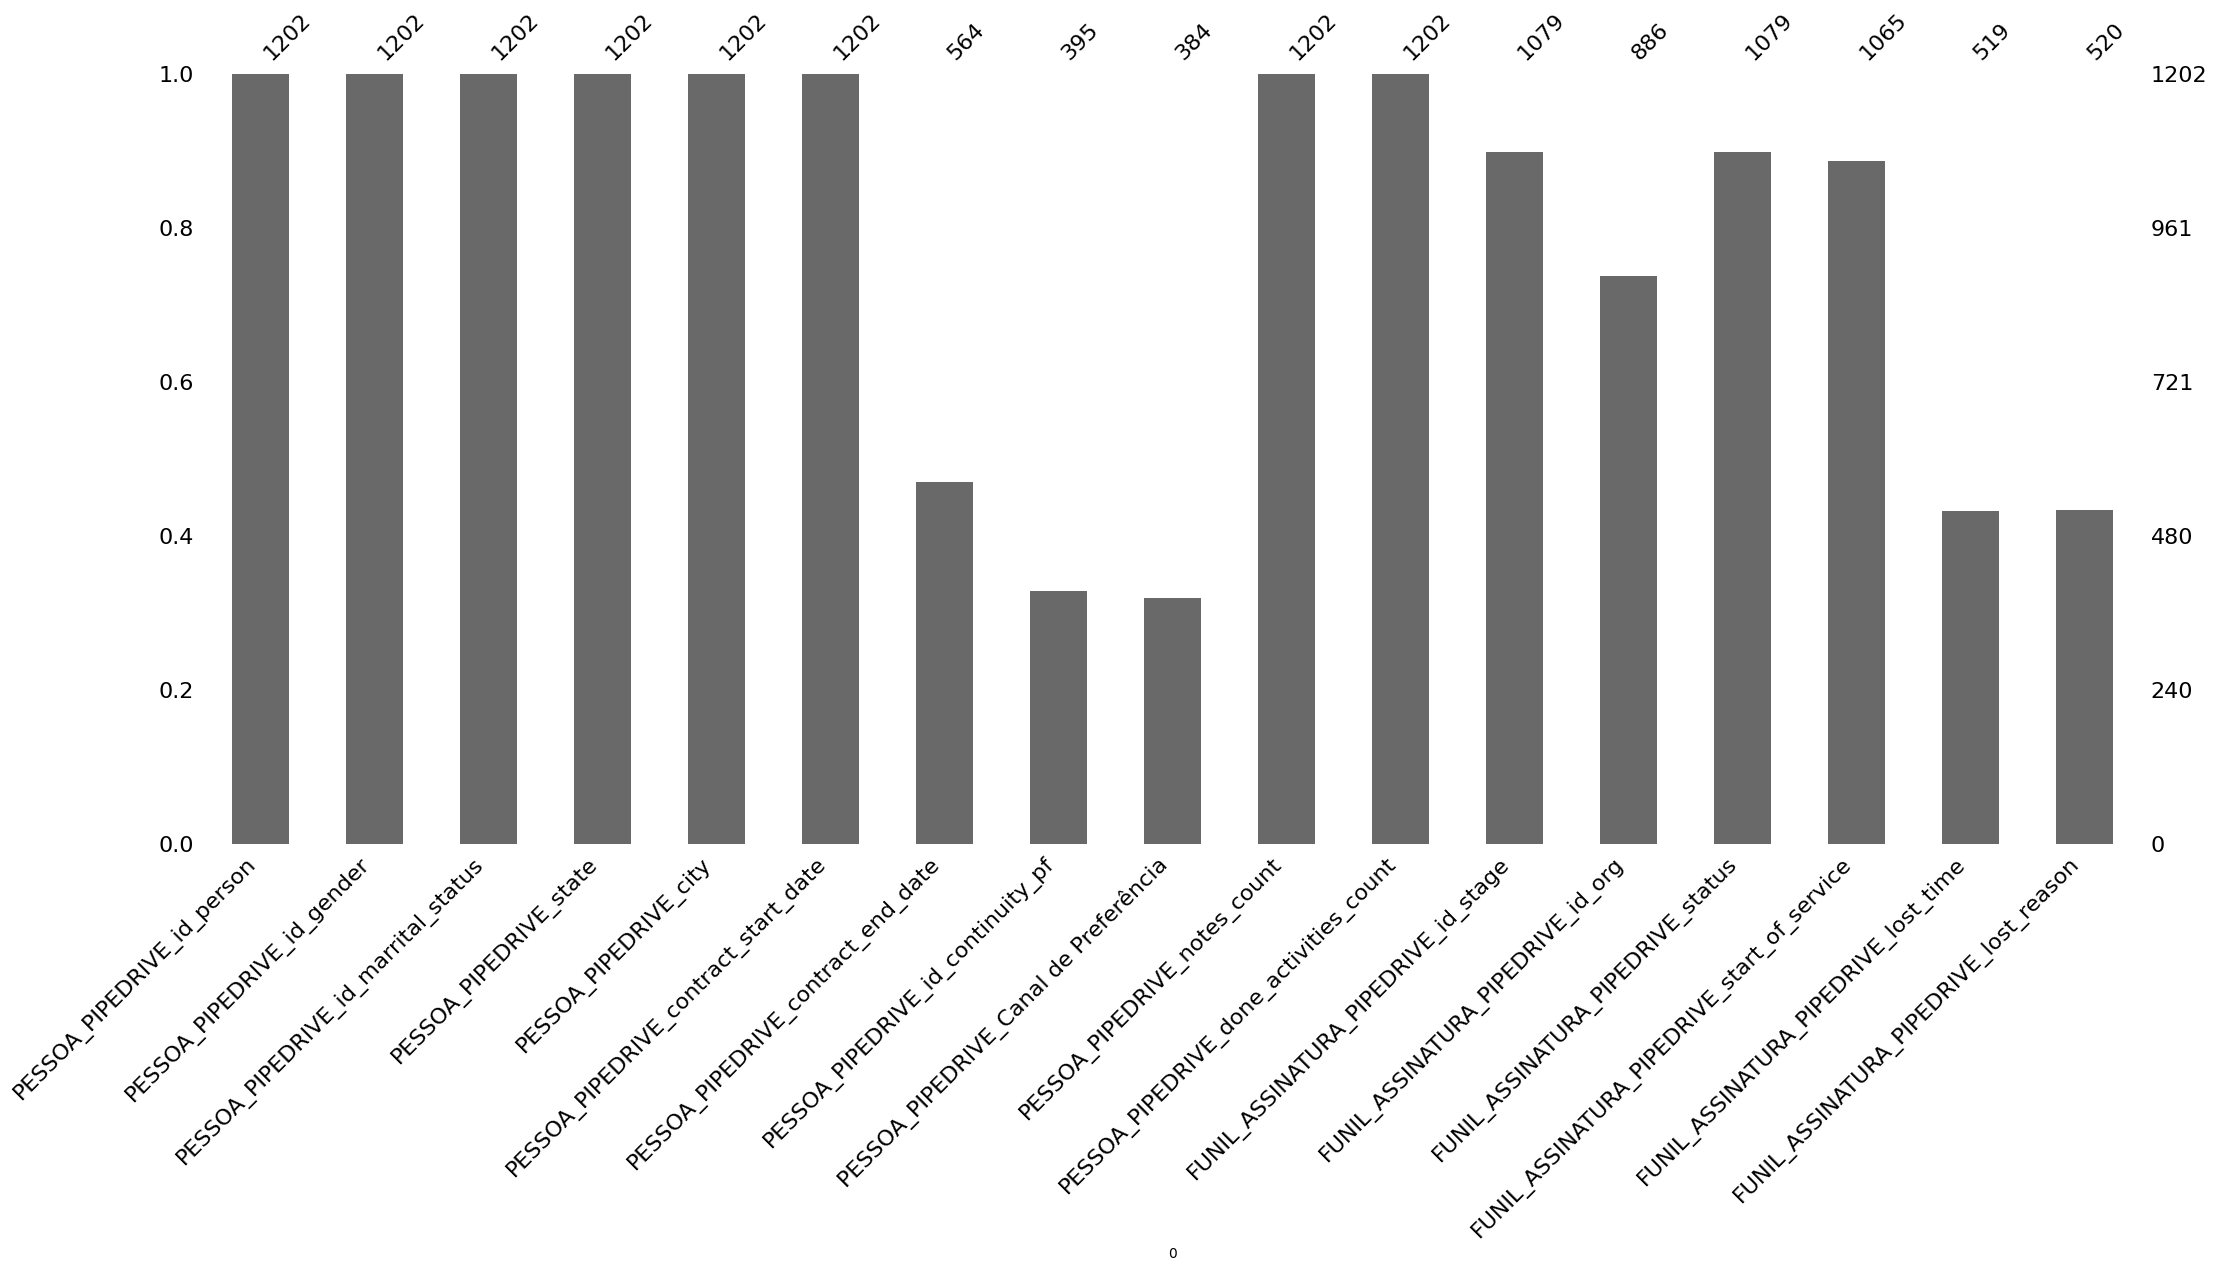

In [41]:
msno.bar(data.iloc[:,:17])

# PESSOA_PIPEDRIVE_contract_end_date

Data de término do último contrato de assintura do benefício da Ana Health


In [42]:
data["PESSOA_PIPEDRIVE_contract_end_date"].value_counts()

PESSOA_PIPEDRIVE_contract_end_date
2022-09-11    59
2022-09-22    24
2022-08-31    15
2022-10-11    12
2023-05-24     9
              ..
2023-07-14     1
2023-11-04     1
2022-06-26     1
2022-05-26     1
2023-09-22     1
Name: count, Length: 271, dtype: int64

In [43]:
data["PESSOA_PIPEDRIVE_tem_data_de_termino_de_contrato"] = data["PESSOA_PIPEDRIVE_contract_end_date"].apply(lambda x: 0 if pd.isna(x) else 1)

# PESSOA_PIPEDRIVE_id_continuity_pf

<Axes: >

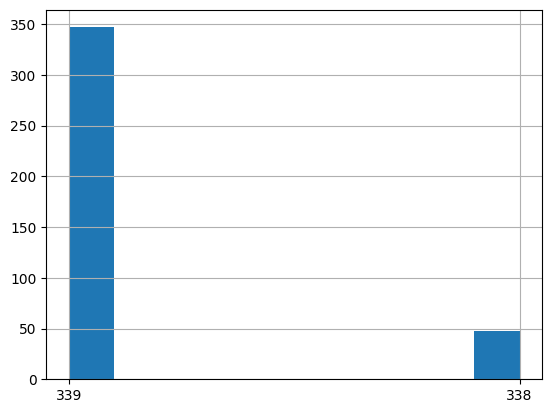

In [44]:
data["PESSOA_PIPEDRIVE_id_continuity_pf"].hist()

drop the column with no information

In [45]:
data.drop(["PESSOA_PIPEDRIVE_id_continuity_pf"], axis=1, inplace=True)

# PESSOA_PIPEDRIVE_Canal de Preferência

In [46]:
data["PESSOA_PIPEDRIVE_Canal de Preferência"].value_counts()

PESSOA_PIPEDRIVE_Canal de Preferência
239    352
360     18
238     14
Name: count, dtype: int64

In [47]:
data["PESSOA_PIPEDRIVE_Canal de Preferência"].fillna(0, inplace=True)

In [48]:
data["PESSOA_PIPEDRIVE_Tem_Canal_de_Preferência"] = data["PESSOA_PIPEDRIVE_Canal de Preferência"].apply(lambda x: 1 if int(x) > 0  else 0)

# PESSOA_PIPEDRIVE_notes_count

In [49]:
data["PESSOA_PIPEDRIVE_notes_count"].value_counts()

PESSOA_PIPEDRIVE_notes_count
0     534
1     290
2     188
3     122
4      37
5      20
6       3
31      2
8       2
7       2
22      1
9       1
Name: count, dtype: int64

<Axes: >

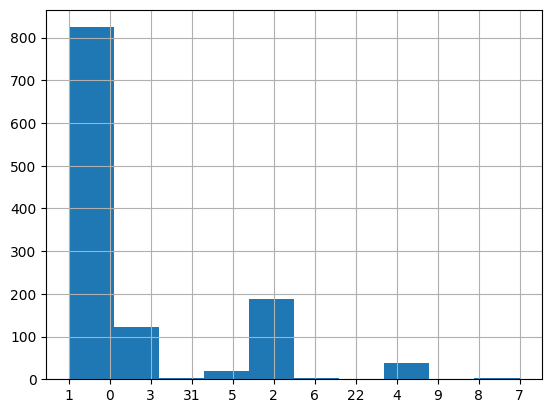

In [50]:
data["PESSOA_PIPEDRIVE_notes_count"].hist()

Criar uma coluna para saber se a pessoa tem ou não notas

In [51]:
data["PESSOA_PIPEDRIVE_has_notes"] = data["PESSOA_PIPEDRIVE_notes_count"].apply(lambda x: 1 if int(x) > 0 else 0)